In [ ]:
# !pip install pingouin

In [1]:
import numpy as np
import pandas as pd
import pingouin as pg

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PowerTransformer

/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/anaconda3/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.7, the latest is 0.3.8.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [2]:
data = pd.read_csv('../../processed-data/tidy_socialmedia_data.csv', index_col=0)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8687 entries, 1 to 12245
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Participant                      8687 non-null   int64  
 1   Date                             8687 non-null   object 
 2   Day                              8687 non-null   object 
 3   Time                             8687 non-null   object 
 4   Session.Name                     8687 non-null   object 
 5   Notification.No                  8687 non-null   int64  
 6   LifePak.Download.No              8687 non-null   int64  
 7   Responded                        8687 non-null   int64  
 8   Completed.Session                8687 non-null   int64  
 9   Session.Instance                 8687 non-null   float64
 10  Session.Instance.Response.Lapse  8687 non-null   object 
 11  Reminders.Delivered              8687 non-null   int64  
 12  Fatigue            

In [4]:
data['Date']= pd.to_datetime(data['Date'])

In [5]:
data

,Participant,Date,Day,Time,Session.Name,Notification.No,LifePak.Download.No,Responded,Completed.Session,Session.Instance,...,Loneliness,Concentrat,LossOfInt,Inferior,Hopeless,Stress,PSMU,News,ASMU,full_count
1,115091,2017-05-02,Tuesday,10:00:06,Daily questions,1,1,1,1,1.0,...,61.0,64.0,68.0,50.0,56.0,73.0,66.0,39.0,38.0,10
2,115091,2017-05-02,Tuesday,12:02:48,Daily questions,2,1,1,1,2.0,...,57.0,70.0,58.0,37.0,56.0,67.0,0.0,27.0,23.0,10
3,115091,2017-05-02,Tuesday,14:03:02,Daily questions,3,1,1,1,3.0,...,44.0,70.0,67.0,26.0,38.0,39.0,63.0,34.0,36.0,10
4,115091,2017-05-02,Tuesday,16:34:28,Daily questions,4,1,1,1,4.0,...,56.0,79.0,89.0,30.0,20.0,60.0,67.0,29.0,23.0,10
6,115091,2017-05-02,Tuesday,20:02:12,Daily questions,6,1,1,1,5.0,...,0.0,27.0,83.0,15.0,3.0,25.0,16.0,0.0,0.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12241,9873359,2017-04-25,Tuesday,14:00:09,Daily questions,3,1,1,1,81.0,...,0.0,14.0,0.0,0.0,0.0,14.0,22.0,0.0,0.0,10
12242,9873359,2017-04-25,Tuesday,16:40:58,Daily questions,4,1,1,1,82.0,...,0.0,11.0,0.0,0.0,0.0,0.0,6.0,0.0,24.0,10
12243,9873359,2017-04-25,Tuesday,18:00:06,Daily questions,5,1,1,1,83.0,...,0.0,10.0,0.0,0.0,0.0,0.0,11.0,0.0,18.0,10
12244,9873359,2017-04-25,Tuesday,20:05:31,Daily questions,6,1,1,1,84.0,...,8.0,22.0,8.0,0.0,0.0,15.0,10.0,0.0,0.0,10


In [8]:
aov = pg.rm_anova(dv='Loneliness', within='Day', 
                  subject='Participant', data=data, detailed=True,
                  effsize="ng2")
aov

,Source,SS,DF,MS,F,p-unc,p-GG-corr,ng2,eps,sphericity,W-spher,p-spher
0,Day,285.438493,6,47.573082,1.212026,0.297797,0.301795,0.002152,0.835358,False,0.509777,1.774515e-09
1,Error,29202.657864,744,39.250884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
dailyMean = data.groupby(["Participant", "Date"], as_index=False)[['Fatigue', 'LowMood', 'Loneliness', 'Concentrat', 'LossOfInt', 'Inferior', 'Hopeless', 'Stress']].mean()
dailyMean.round()

,Participant,Date,Fatigue,LowMood,Loneliness,Concentrat,LossOfInt,Inferior,Hopeless,Stress
0,115091,2017-05-02,42.0,33.0,36.0,59.0,73.0,30.0,32.0,53.0
1,115091,2017-05-03,63.0,23.0,21.0,56.0,56.0,11.0,18.0,36.0
2,115091,2017-05-04,78.0,29.0,34.0,67.0,73.0,24.0,28.0,60.0
3,115091,2017-05-05,27.0,16.0,17.0,25.0,44.0,24.0,18.0,31.0
4,115091,2017-05-06,67.0,32.0,34.0,37.0,46.0,39.0,18.0,49.0
...,...,...,...,...,...,...,...,...,...,...
1722,9873359,2017-04-21,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1723,9873359,2017-04-22,22.0,3.0,1.0,0.0,6.0,0.0,0.0,6.0
1724,9873359,2017-04-23,27.0,2.0,5.0,0.0,8.0,0.0,2.0,1.0
1725,9873359,2017-04-24,9.0,2.0,3.0,11.0,2.0,2.0,2.0,1.0


In [14]:
participant_list = []

for index, row in dailyMean.iterrows():
        if row['Participant'] in participant_list:
            idx += 1
            dailyMean['DateIdx'].loc[index] = idx
            # dailyMean['DateIdx'] = idx
        else:
            participant_list.append(row['Participant'])
            idx = 1
            dailyMean['DateIdx'].loc[index] = idx

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [15]:
len(participant_list)

125

In [16]:
dailyMean.head(50)

,Participant,Date,Fatigue,LowMood,Loneliness,Concentrat,LossOfInt,Inferior,Hopeless,Stress,DateIdx
0,115091,2017-05-02,41.666667,33.000000,36.333333,59.000000,72.833333,30.500000,31.666667,52.666667,1
1,115091,2017-05-03,63.166667,22.666667,21.000000,56.000000,56.166667,11.333333,18.333333,36.333333,2
2,115091,2017-05-04,78.333333,28.833333,34.500000,66.833333,73.333333,24.333333,28.500000,59.833333,3
3,115091,2017-05-05,27.333333,16.500000,16.833333,25.333333,44.500000,24.333333,18.166667,30.833333,4
4,115091,2017-05-06,67.200000,32.200000,33.600000,37.000000,46.000000,39.000000,18.000000,49.400000,5
5,115091,2017-05-07,24.333333,14.333333,29.833333,23.500000,35.833333,16.333333,12.333333,15.000000,6
6,115091,2017-05-08,45.400000,17.400000,22.000000,29.600000,45.800000,12.800000,25.400000,48.800000,7
7,115091,2017-05-09,62.000000,45.000000,38.833333,51.500000,41.833333,16.166667,44.500000,63.833333,8
8,115091,2017-05-10,40.571429,13.285714,16.714286,30.142857,42.571429,12.714286,24.000000,20.285714,9
9,115091,2017-05-11,22.333333,10.666667,14.833333,16.500000,23.833333,13.500000,14.833333,22.333333,10


In [252]:
dailyMean.DateIdx.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [253]:
dailyFatigue = dailyMean.filter(['Participant','DateIdx','Fatigue'], axis=1)

In [254]:
dailyFatigue.round()

,Participant,DateIdx,Fatigue
0,115091,1,42.0
1,115091,2,63.0
2,115091,3,78.0
3,115091,4,27.0
4,115091,5,67.0
...,...,...,...
1722,9873359,10,8.0
1723,9873359,11,22.0
1724,9873359,12,27.0
1725,9873359,13,9.0


In [255]:
aov = pg.rm_anova(dv='Fatigue', within='DateIdx', subject='Participant',
                  data=dailyFatigue, detailed=True, effsize="ng2")
aov.round(6)

,Source,SS,DF,MS,F,p-unc,p-GG-corr,ng2,eps,sphericity,W-spher,p-spher
0,DateIdx,7655.151870,13,588.857836,2.394326,0.003458,0.008008,0.008633,0.775342,False,0.166449,0.0
1,Error,377270.160935,1534,245.938827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


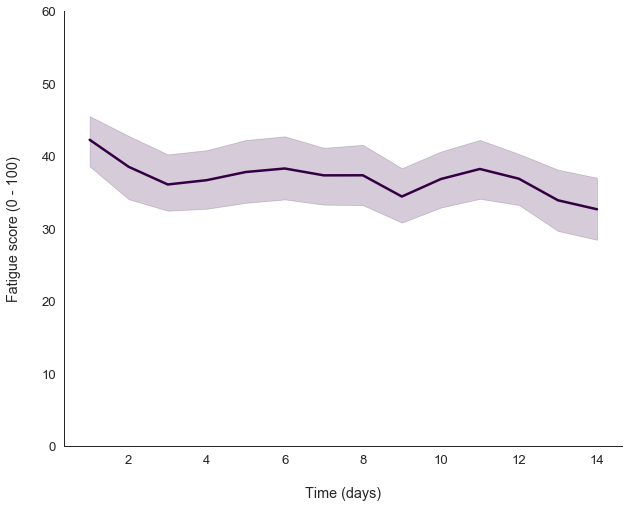

In [256]:
dailyFatigue = dailyFatigue[dailyFatigue.DateIdx != 15]

sns.set(rc={'figure.figsize':(10,8)})
sns.set_style("white")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})

ax = sns.lineplot(data=dailyFatigue, x="DateIdx", y="Fatigue", color='#340043')
ax.set_ylim([0,60])
ax.set_ylabel("Fatigue score (0 - 100)\n")
ax.set_xlabel("\nTime (days)")

sns.despine()

In [257]:
dailyLowMood = dailyMean.filter(['Participant','DateIdx','LowMood'], axis=1)
dailyLowMood = dailyLowMood[dailyLowMood.DateIdx != 15]

aov = pg.rm_anova(dv='LowMood', within='DateIdx', subject='Participant',
                  data=dailyLowMood, detailed=True, effsize="ng2")
aov.round(6)

,Source,SS,DF,MS,F,p-unc,p-GG-corr,ng2,eps,sphericity,W-spher,p-spher
0,DateIdx,3531.153846,13,271.627219,2.830375,0.000498,0.003019,0.009702,0.672351,False,0.054843,0.0
1,Error,147215.904627,1534,95.968647,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [258]:
dailyLoneliness = dailyMean.filter(['Participant','DateIdx','Loneliness'], axis=1)
dailyLoneliness = dailyLoneliness[dailyLoneliness.DateIdx != 15]

aov = pg.rm_anova(dv='Loneliness', within='DateIdx', subject='Participant',
                  data=dailyLoneliness, detailed=True, effsize="ng2")
aov.round(6)

,Source,SS,DF,MS,F,p-unc,p-GG-corr,ng2,eps,sphericity,W-spher,p-spher
0,DateIdx,2291.045347,13,176.234257,2.393999,0.003463,0.013845,0.007202,0.631869,False,0.02233,0.0
1,Error,112925.428103,1534,73.615012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [259]:
dailyConcentrat = dailyMean.filter(['Participant','DateIdx','Concentrat'], axis=1)
dailyConcentrat = dailyConcentrat[dailyConcentrat.DateIdx != 15]

aov = pg.rm_anova(dv='Concentrat', within='DateIdx', subject='Participant',
                  data=dailyConcentrat, detailed=True, effsize="ng2")
aov.round(6)

,Source,SS,DF,MS,F,p-unc,p-GG-corr,ng2,eps,sphericity,W-spher,p-spher
0,DateIdx,10183.434363,13,783.341105,4.311095,0.0,0.000006,0.015898,0.767466,False,0.162583,0.0
1,Error,278733.191630,1534,181.703515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [260]:
dailyLossOfInt = dailyMean.filter(['Participant','DateIdx','LossOfInt'], axis=1)
dailyLossOfInt = dailyLossOfInt[dailyLossOfInt.DateIdx != 15]

aov = pg.rm_anova(dv='LossOfInt', within='DateIdx', subject='Participant',
                  data=dailyLossOfInt, detailed=True, effsize="ng2")
aov.round(6)

,Source,SS,DF,MS,F,p-unc,p-GG-corr,ng2,eps,sphericity,W-spher,p-spher
0,DateIdx,4157.787832,13,319.829833,1.700578,0.054925,0.084208,0.006357,0.693886,False,0.06805,0.0
1,Error,288501.261681,1534,188.071227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [261]:
dailyInferior = dailyMean.filter(['Participant','DateIdx','Inferior'], axis=1)
dailyInferior = dailyInferior[dailyInferior.DateIdx != 15]

aov = pg.rm_anova(dv='Inferior', within='DateIdx', subject='Participant',
                  data=dailyInferior, detailed=True, effsize="ng2")
aov.round(6)

,Source,SS,DF,MS,F,p-unc,p-GG-corr,ng2,eps,sphericity,W-spher,p-spher
0,DateIdx,1092.505751,13,84.038904,1.675542,0.060084,0.110614,0.004164,0.544411,False,0.010293,0.0
1,Error,76939.699863,1534,50.156258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [262]:
dailyHopeless = dailyMean.filter(['Participant','DateIdx','Hopeless'], axis=1)
dailyHopeless = dailyHopeless[dailyHopeless.DateIdx != 15]

aov = pg.rm_anova(dv='Hopeless', within='DateIdx', subject='Participant',
                  data=dailyHopeless, detailed=True, effsize="ng2")
aov.round(6)

,Source,SS,DF,MS,F,p-unc,p-GG-corr,ng2,eps,sphericity,W-spher,p-spher
0,DateIdx,1657.100703,13,127.469285,1.963881,0.02038,0.051657,0.005545,0.58323,False,0.020909,0.0
1,Error,98723.265441,1521,64.906815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [263]:
dailyStress = dailyMean.filter(['Participant','DateIdx','Stress'], axis=1)
dailyStress = dailyStress[dailyStress.DateIdx != 15]

aov = pg.rm_anova(dv='Stress', within='DateIdx', subject='Participant',
                  data=dailyStress, detailed=True, effsize="ng2")
aov.round(6)

,Source,SS,DF,MS,F,p-unc,p-GG-corr,ng2,eps,sphericity,W-spher,p-spher
0,DateIdx,6087.005495,13,468.231192,3.279276,0.000061,0.001271,0.01039,0.592359,False,0.033605,0.0
1,Error,219032.101066,1534,142.784942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


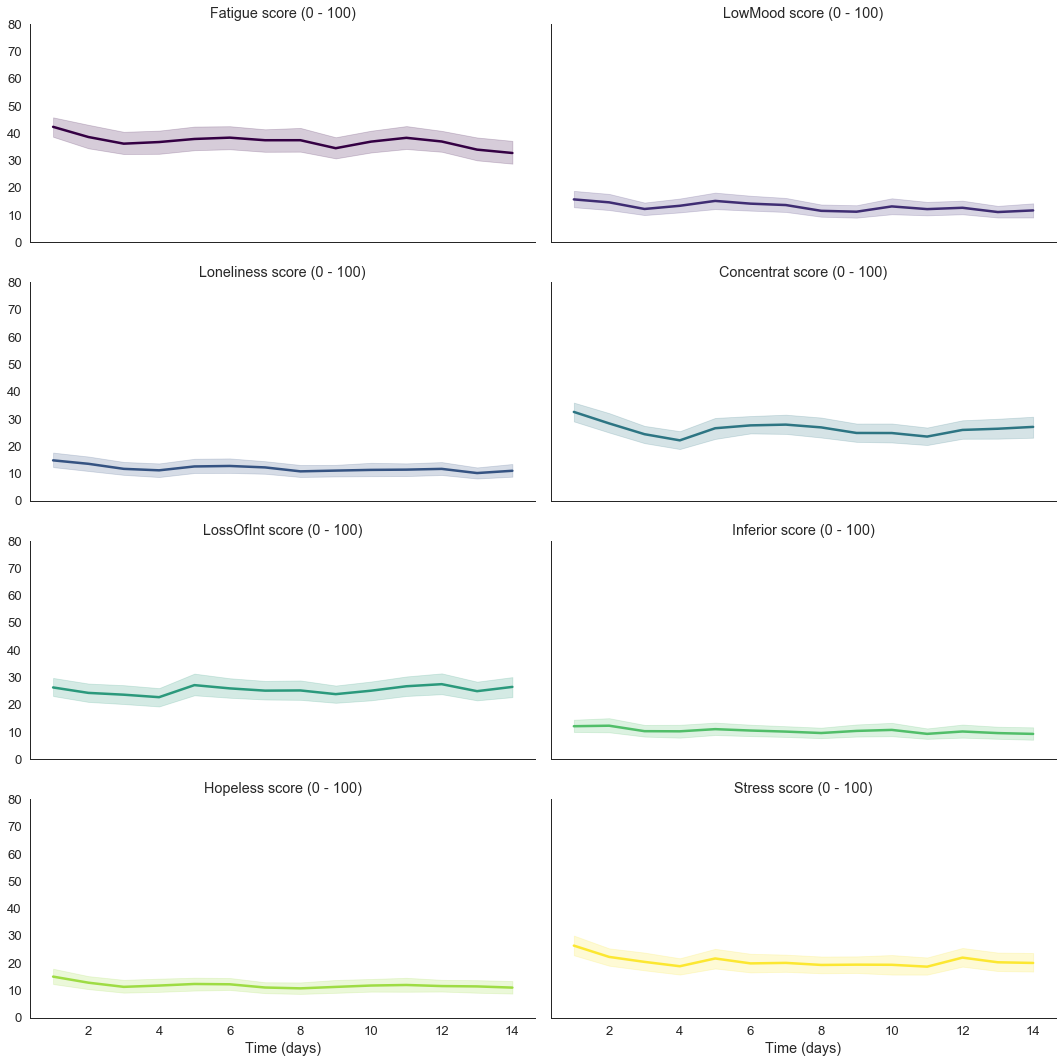

In [264]:
sns.set_style("white")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15), sharex=True, sharey=True)

g1 = sns.lineplot(ax=axes[0][0], data=dailyFatigue, x="DateIdx", y="Fatigue", color='#340043')
g1.set(ylabel=None)
g1.set(title='Fatigue score (0 - 100)')
g2 = sns.lineplot(ax=axes[0][1], data=dailyLowMood, x="DateIdx", y="LowMood", color='#3F2D73')
g2.set(title='LowMood score (0 - 100)')
g3 = sns.lineplot(ax=axes[1][0], data=dailyLoneliness, x="DateIdx", y="Loneliness", color='#355382')
g3.set(ylabel=None)
g3.set(title='Loneliness score (0 - 100)')
g4 = sns.lineplot(ax=axes[1][1], data=dailyConcentrat, x="DateIdx", y="Concentrat", color='#2D7583')
g4.set(title='Concentrat score (0 - 100)')
g5 = sns.lineplot(ax=axes[2][0], data=dailyLossOfInt, x="DateIdx", y="LossOfInt", color='#2B997C')
g5.set(ylabel=None)
g5.set(title='LossOfInt score (0 - 100)')
g6 = sns.lineplot(ax=axes[2][1], data=dailyInferior, x="DateIdx", y="Inferior", color='#51BE69')
g6.set(title='Inferior score (0 - 100)')
g7 = sns.lineplot(ax=axes[3][0], data=dailyHopeless, x="DateIdx", y="Hopeless", color='#9EDC44')
g7.set(ylabel=None)
g7.set(xlabel='Time (days)')
g7.set(title='Hopeless score (0 - 100)')
g8 = sns.lineplot(ax=axes[3][1], data=dailyStress, x="DateIdx", y="Stress", color='#FCE731')
g8.set(title='Stress score (0 - 100)')
g8.set_ylim([0,80])

plt.xlabel("Time (days)")
plt.tight_layout()
sns.despine()

plt.savefig('../../figures/ESM_quest-dailyMean-line.png')

In [265]:
clustered_data = pd.read_csv('../../processed-data/cluster3_socialmedia_data.csv')
clustered_data

,Participant,PSMU,News,ASMU,Fatigue,LowMood,Loneliness,Concentrat,LossOfInt,Inferior,Hopeless,Stress,Sintomas_Cluster3
0,115091,32.883117,15.012987,16.792208,45.155844,20.454545,23.285714,37.272727,47.675325,17.831169,21.389610,37.441558,1
1,131183,45.203390,11.593220,28.254237,36.288136,3.474576,0.389831,19.508475,14.508475,0.254237,0.406780,16.898305,0
2,438907,44.595745,34.645833,27.040816,51.040816,26.285714,21.833333,35.729167,50.979592,23.395833,14.591837,25.000000,1
3,515070,25.711538,38.576923,37.826923,34.865385,12.692308,14.076923,32.903846,16.038462,11.403846,10.500000,17.365385,0
4,572172,36.852273,45.250000,40.545455,18.272727,10.738636,9.375000,14.352273,25.761364,38.056818,17.431818,20.511364,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,9585150,21.592593,1.018519,9.611111,58.018519,7.592593,0.500000,6.962963,22.000000,0.018519,0.240741,3.722222,0
121,9593823,54.441176,18.779412,47.558824,32.397059,17.588235,14.955882,23.298507,17.544118,8.397059,13.044776,23.164179,0
122,9813325,18.754098,18.967213,12.704918,18.967213,10.081967,7.836066,8.049180,10.180328,7.852459,6.950820,9.688525,2
123,9873128,50.044444,16.307692,7.582418,22.967033,8.439560,8.747253,12.439560,12.466667,7.923077,7.791209,8.222222,2


In [266]:
clusters = clustered_data[['Participant', 'Sintomas_Cluster3']]
clusters

,Participant,Sintomas_Cluster3
0,115091,1
1,131183,0
2,438907,1
3,515070,0
4,572172,0
...,...,...
120,9585150,0
121,9593823,0
122,9813325,2
123,9873128,2


In [267]:
dailyFatigue = dailyFatigue.pivot(index='Participant', columns='DateIdx', values='Fatigue')
dailyFatigue

DateIdx,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Participant,,,,,,,,,,,,,,
115091,41.666667,63.166667,78.333333,27.333333,67.200000,24.333333,45.400000,62.000000,40.571429,22.333333,62.666667,42.571429,26.333333,30.000000
131183,41.200000,0.000000,77.333333,43.333333,50.333333,46.000000,18.000000,28.200000,28.333333,0.000000,69.000000,31.000000,14.250000,66.500000
438907,65.857143,74.000000,57.800000,43.200000,21.000000,14.666667,51.000000,71.666667,NaN,67.000000,32.666667,40.500000,47.000000,13.000000
515070,58.000000,33.500000,9.000000,53.666667,58.166667,44.500000,48.833333,66.000000,0.000000,9.428571,13.285714,0.000000,NaN,NaN
572172,27.857143,18.800000,16.000000,28.857143,33.000000,21.500000,15.571429,29.500000,19.428571,18.333333,6.600000,7.142857,5.714286,1.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9585150,78.800000,80.500000,67.000000,85.000000,57.166667,36.500000,34.333333,43.166667,34.833333,51.750000,68.250000,78.666667,74.333333,37.000000
9593823,62.000000,24.857143,40.000000,23.571429,26.571429,67.800000,27.000000,31.000000,30.333333,19.250000,21.250000,29.400000,23.000000,24.666667
9813325,14.400000,23.333333,2.200000,3.000000,32.400000,14.333333,1.666667,27.333333,7.333333,38.333333,27.400000,19.666667,30.500000,16.666667


In [268]:
dailyFatigue_cluster = dailyFatigue.reset_index().merge(clusters.reset_index(), left_index=True, right_index=True, how='left')
dailyFatigue_cluster = dailyFatigue_cluster.drop(['Participant_y', 'index'], axis=1).rename(columns={'Participant_x': 'Participant', 'Sintomas_Cluster3': 'Cluster'}).round()
dailyFatigue_cluster

,Participant,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Cluster
0,115091,42.0,63.0,78.0,27.0,67.0,24.0,45.0,62.0,41.0,22.0,63.0,43.0,26.0,30.0,1
1,131183,41.0,0.0,77.0,43.0,50.0,46.0,18.0,28.0,28.0,0.0,69.0,31.0,14.0,66.0,0
2,438907,66.0,74.0,58.0,43.0,21.0,15.0,51.0,72.0,NaN,67.0,33.0,40.0,47.0,13.0,1
3,515070,58.0,34.0,9.0,54.0,58.0,44.0,49.0,66.0,0.0,9.0,13.0,0.0,NaN,NaN,0
4,572172,28.0,19.0,16.0,29.0,33.0,22.0,16.0,30.0,19.0,18.0,7.0,7.0,6.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,9585150,79.0,80.0,67.0,85.0,57.0,36.0,34.0,43.0,35.0,52.0,68.0,79.0,74.0,37.0,0
121,9593823,62.0,25.0,40.0,24.0,27.0,68.0,27.0,31.0,30.0,19.0,21.0,29.0,23.0,25.0,0
122,9813325,14.0,23.0,2.0,3.0,32.0,14.0,2.0,27.0,7.0,38.0,27.0,20.0,30.0,17.0,2
123,9873128,33.0,40.0,37.0,27.0,24.0,19.0,14.0,15.0,28.0,11.0,26.0,17.0,16.0,10.0,2


In [269]:
dailyFatigue_cluster_long = pd.melt(dailyFatigue_cluster, id_vars=['Participant', 'Cluster'], var_name='DateIdx', value_name='Fatigue')
dailyFatigue_cluster_long

,Participant,Cluster,DateIdx,Fatigue
0,115091,1,1,42.0
1,131183,0,1,41.0
2,438907,1,1,66.0
3,515070,0,1,58.0
4,572172,0,1,28.0
...,...,...,...,...
1745,9585150,0,14,37.0
1746,9593823,0,14,25.0
1747,9813325,2,14,17.0
1748,9873128,2,14,10.0


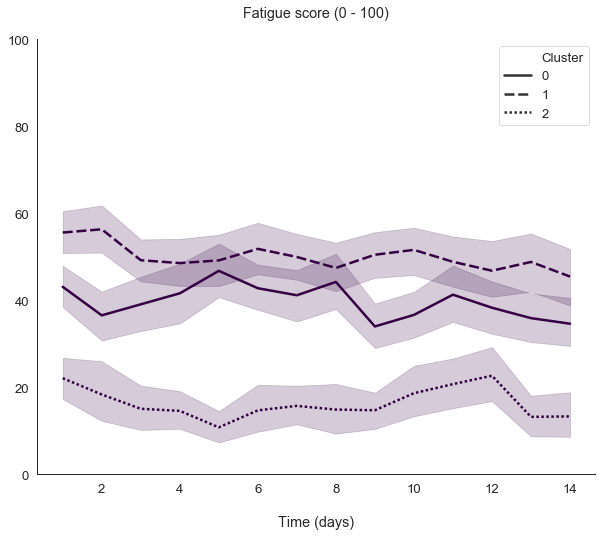

In [216]:
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style("white")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})

ax = sns.lineplot(data=dailyFatigue_cluster_long, x="DateIdx", y="Fatigue", color='#340043', style="Cluster")
ax.set_ylim([0,100])
ax.set_ylabel(None)
ax.set_title("Fatigue score (0 - 100)\n")
ax.set_xlabel("\nTime (days)")

sns.despine()

In [ ]:
# Pivot dataframe to wide format so we can add cluster id
dailyLowMood = dailyLowMood.pivot(index='Participant', columns='DateIdx', values='LowMood')

# Merge wide dataframe with cluster id dataframe and clean
dailyLowMood_cluster = dailyLowMood.reset_index().merge(clusters.reset_index(), left_index=True, right_index=True, how='left')
dailyLowMood_cluster = dailyLowMood_cluster.drop(['Participant_y', 'index'], axis=1).rename(columns={'Participant_x': 'Participant', 'Sintomas_Cluster3': 'Cluster'}).round()

# Melt dataframe to long format so we can plot it
dailyLowMood_cluster_long = pd.melt(dailyLowMood_cluster, id_vars=['Participant', 'Cluster'], var_name='DateIdx', value_name='LowMood')

In [ ]:
# Pivot dataframe to wide format so we can add cluster id
dailyLoneliness = dailyLoneliness.pivot(index='Participant', columns='DateIdx', values='Loneliness')

# Merge wide dataframe with cluster id dataframe and clean
dailyLoneliness = dailyLoneliness.reset_index().merge(clusters.reset_index(), left_index=True, right_index=True, how='left')
dailyLoneliness_cluster = dailyLoneliness.drop(['Participant_y', 'index'], axis=1).rename(columns={'Participant_x': 'Participant', 'Sintomas_Cluster3': 'Cluster'}).round()

# Melt dataframe to long format so we can plot it
dailyLoneliness_cluster_long = pd.melt(dailyLoneliness_cluster, id_vars=['Participant', 'Cluster'], var_name='DateIdx', value_name='Loneliness')

In [ ]:
# Pivot dataframe to wide format so we can add cluster id
dailyConcentrat = dailyConcentrat.pivot(index='Participant', columns='DateIdx', values='Concentrat')

# Merge wide dataframe with cluster id dataframe and clean
dailyConcentrat_cluster = dailyConcentrat.reset_index().merge(clusters.reset_index(), left_index=True, right_index=True, how='left')
dailyConcentrat_cluster = dailyConcentrat_cluster.drop(['Participant_y', 'index'], axis=1).rename(columns={'Participant_x': 'Participant', 'Sintomas_Cluster3': 'Cluster'}).round()

# Melt dataframe to long format so we can plot it
dailyConcentrat_cluster_long = pd.melt(dailyConcentrat_cluster, id_vars=['Participant', 'Cluster'], var_name='DateIdx', value_name='Concentrat')

In [ ]:
# Pivot dataframe to wide format so we can add cluster id
dailyLossOfInt = dailyLossOfInt.pivot(index='Participant', columns='DateIdx', values='LossOfInt')

# Merge wide dataframe with cluster id dataframe and clean
dailyLossOfInt_cluster = dailyLossOfInt.reset_index().merge(clusters.reset_index(), left_index=True, right_index=True, how='left')
dailyLossOfInt_cluster = dailyLossOfInt_cluster.drop(['Participant_y', 'index'], axis=1).rename(columns={'Participant_x': 'Participant', 'Sintomas_Cluster3': 'Cluster'}).round()

# Melt dataframe to long format so we can plot it
dailyLossOfInt_cluster_long = pd.melt(dailyLossOfInt_cluster, id_vars=['Participant', 'Cluster'], var_name='DateIdx', value_name='LossOfInt')

In [ ]:
# Pivot dataframe to wide format so we can add cluster id
dailyInferior = dailyInferior.pivot(index='Participant', columns='DateIdx', values='Inferior')

# Merge wide dataframe with cluster id dataframe and clean
dailyInferior_cluster = dailyInferior.reset_index().merge(clusters.reset_index(), left_index=True, right_index=True, how='left')
dailyInferior_cluster = dailyInferior_cluster.drop(['Participant_y', 'index'], axis=1).rename(columns={'Participant_x': 'Participant', 'Sintomas_Cluster3': 'Cluster'}).round()

# Melt dataframe to long format so we can plot it
dailyInferior_cluster_long = pd.melt(dailyInferior_cluster, id_vars=['Participant', 'Cluster'], var_name='DateIdx', value_name='Inferior')

In [ ]:
# Pivot dataframe to wide format so we can add cluster id
dailyHopeless = dailyHopeless.pivot(index='Participant', columns='DateIdx', values='Hopeless')

# Merge wide dataframe with cluster id dataframe and clean
dailyHopeless_cluster = dailyHopeless.reset_index().merge(clusters.reset_index(), left_index=True, right_index=True, how='left')
dailyHopeless_cluster = dailyHopeless_cluster.drop(['Participant_y', 'index'], axis=1).rename(columns={'Participant_x': 'Participant', 'Sintomas_Cluster3': 'Cluster'}).round()

# Melt dataframe to long format so we can plot it
dailyHopeless_cluster_long = pd.melt(dailyHopeless_cluster, id_vars=['Participant', 'Cluster'], var_name='DateIdx', value_name='Hopeless')

In [ ]:
# Pivot dataframe to wide format so we can add cluster id
dailyStress = dailyStress.pivot(index='Participant', columns='DateIdx', values='Stress')

# Merge wide dataframe with cluster id dataframe and clean
dailyStress_cluster = dailyStress.reset_index().merge(clusters.reset_index(), left_index=True, right_index=True, how='left')
dailyStress_cluster = dailyStress_cluster.drop(['Participant_y', 'index'], axis=1).rename(columns={'Participant_x': 'Participant', 'Sintomas_Cluster3': 'Cluster'}).round()

# Melt dataframe to long format so we can plot it
dailyStress_cluster_long = pd.melt(dailyStress_cluster, id_vars=['Participant', 'Cluster'], var_name='DateIdx', value_name='Stress')

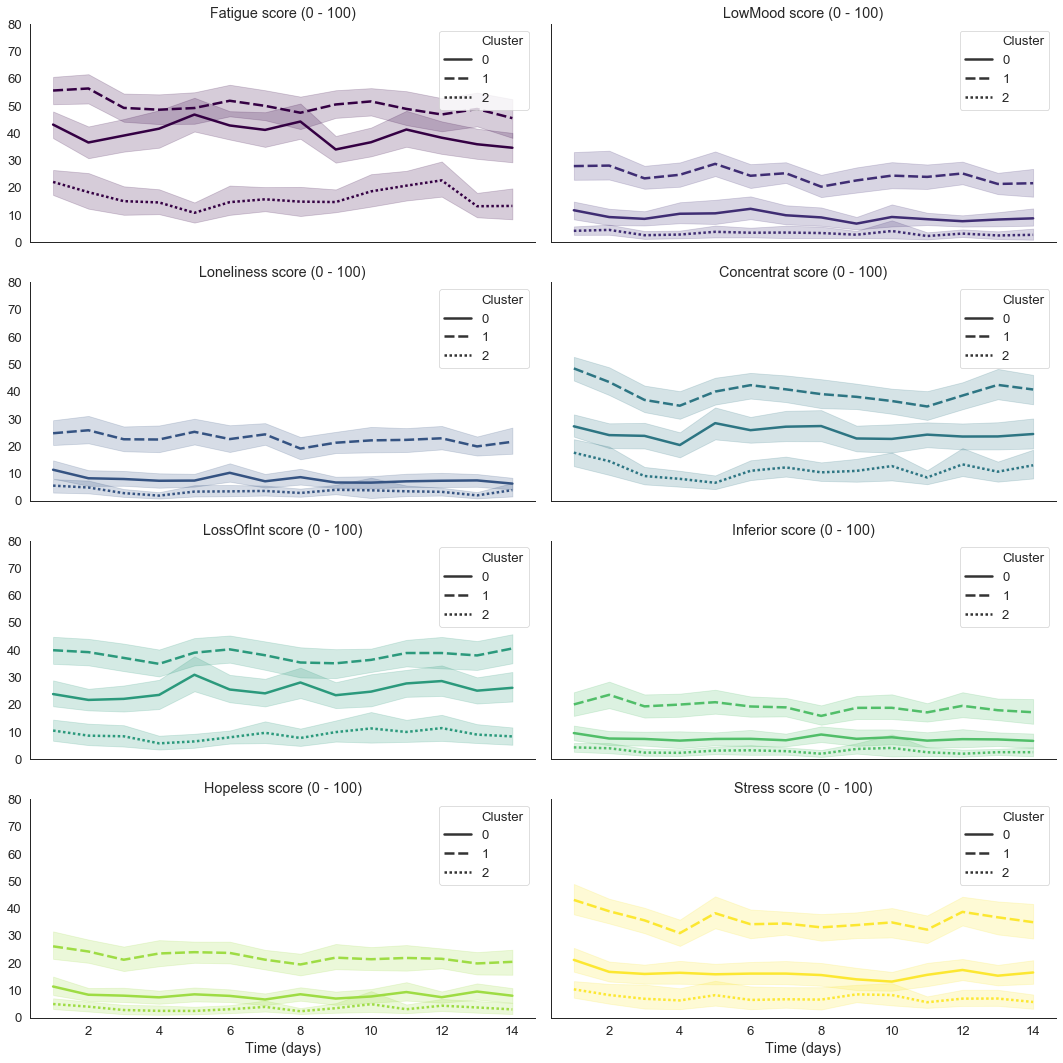

In [270]:
sns.set(rc={'figure.figsize':(15,15)})
sns.set_style("white")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15), sharex=True, sharey=True)

g1 = sns.lineplot(ax=axes[0][0], data=dailyFatigue_cluster_long,
                  x="DateIdx", y="Fatigue", color='#340043', style="Cluster")
g1.set(ylabel=None)
g1.set(title='Fatigue score (0 - 100)')
g2 = sns.lineplot(ax=axes[0][1], data=dailyLowMood_cluster_long,
                  x="DateIdx", y="LowMood", color='#3F2D73', style="Cluster")
g2.set(title='LowMood score (0 - 100)')
g3 = sns.lineplot(ax=axes[1][0], data=dailyLoneliness_cluster_long,
                  x="DateIdx", y="Loneliness", color='#355382', style="Cluster")
g3.set(ylabel=None)
g3.set(title='Loneliness score (0 - 100)')
g4 = sns.lineplot(ax=axes[1][1], data=dailyConcentrat_cluster_long,
                  x="DateIdx", y="Concentrat", color='#2D7583', style="Cluster")
g4.set(title='Concentrat score (0 - 100)')
g5 = sns.lineplot(ax=axes[2][0], data=dailyLossOfInt_cluster_long,
                  x="DateIdx", y="LossOfInt", color='#2B997C', style="Cluster")
g5.set(ylabel=None)
g5.set(title='LossOfInt score (0 - 100)')
g6 = sns.lineplot(ax=axes[2][1], data=dailyInferior_cluster_long,
                  x="DateIdx", y="Inferior", color='#51BE69', style="Cluster")
g6.set(title='Inferior score (0 - 100)')
g7 = sns.lineplot(ax=axes[3][0], data=dailyHopeless_cluster_long,
                  x="DateIdx", y="Hopeless", color='#9EDC44', style="Cluster")
g7.set(ylabel=None)
g7.set(xlabel='Time (days)')
g7.set(title='Hopeless score (0 - 100)')
g8 = sns.lineplot(ax=axes[3][1], data=dailyStress_cluster_long,
                  x="DateIdx", y="Stress", color='#FCE731', style="Cluster")
g8.set(title='Stress score (0 - 100)')
g8.set_ylim([0,80])

plt.xlabel("Time (days)")
plt.tight_layout()
sns.despine()

plt.savefig('../../figures/ESM_quest-dailyMean-cluster-line.png')

In [ ]:
test_RMANOVA_long = pd.read_csv('../../processed-data/test_RMANOVA_long.csv')
test_RMANOVA_long.columns = ['Participant', 'Day', 'LowMood']
test_RMANOVA_long

In [ ]:
test_RMANOVA_wide = test_RMANOVA_long.pivot(index='Participant', columns='Day')['LowMood']
test_RMANOVA_wide = test_RMANOVA_wide.reset_index(level=['Participant'])
test_RMANOVA_wide

## 5 cluster solution

In [ ]:
data_clustering_mean = pd.read_csv('../../processed-data/cluster5_socialmedia_data.csv')

In [ ]:
data_clustering_mean

In [ ]:
cluster_ref = data_clustering_mean.Sintomas_Cluster.tolist()

In [ ]:
test_RMANOVA_wide['Cluster'] = cluster_ref

In [ ]:
test_RMANOVA_wide

In [ ]:
test_RMANOVA_wide.to_csv('../../processed-data/test_RMANOVA_LowMood_wide.csv')

In [ ]:
test_RMANOVA_long_cluster = pd.melt(test_RMANOVA_wide, id_vars =['Participant', 'Cluster']).sort_values(by=['Participant', 'Day'])
test_RMANOVA_long_cluster.to_csv('../../processed-data/test_RMANOVA_LowMood_long_cluster.csv')

## 3 cluster solution

In [ ]:
data_clustering3_mean = pd.read_csv('../../processed-data/cluster3_socialmedia_data.csv')

In [ ]:
data_clustering3_mean

In [ ]:
cluster3_ref= data_clustering3_mean.Sintomas_Cluster3.tolist()

In [ ]:
test_RMANOVA_wide['Cluster'] = cluster3_ref
test_RMANOVA_wide

In [ ]:
test_RMANOVA_wide.to_csv('../../processed-data/test_RMANOVA_LowMood_wide_cluster3.csv')

In [ ]:
test_RMANOVA_long_cluster = pd.melt(test_RMANOVA_wide, id_vars =['Participant', 'Cluster']).sort_values(by=['Participant', 'Day'])
test_RMANOVA_long_cluster.to_csv('../../processed-data/test_RMANOVA_LowMood_long_cluster3.csv')